# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

# Loading Data

In [2]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking for missing values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Standardizing input values

In [7]:
df.reset_index(drop=True, inplace=True)
labels = df.pop('Class')
df -= df.mean()
df /= df.std()

# Splitting data into training, testing and validation set

In [9]:
data_len = len(df)
train_data = df.iloc[:data_len*50//100]
val_data = df.iloc[data_len*50//100:data_len*70//100]
test_data = df.iloc[data_len*70//100:]
labels_len = len(labels)
train_labels = labels.iloc[:labels_len*50//100]
val_labels = labels.iloc[labels_len*50//100:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

# Building Model (tanh)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10,activation="tanh",input_shape=(len(train_data.columns),) ))
model.add(Dense(8,activation="tanh",input_shape=(df.shape[1],) ))
model.add(Dense(6,activation="tanh",input_shape=(df.shape[1],) ))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='rmsprop'
              ,loss='binary_crossentropy'
              ,metrics=['accuracy'])

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 459
Trainable params: 459
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(train_data,train_labels,epochs=10,batch_size=256,validation_data=(val_data,val_labels))


Train on 142403 samples, validate on 56961 samples
Epoch 1/10
142403/142403 [==============================] - 2s 12us/step - loss: 0.0839 - accuracy: 0.9815 - val_loss: 1.1413 - val_accuracy: 0.6205
Epoch 2/10
142403/142403 [==============================] - 2s 11us/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 1.2539 - val_accuracy: 0.6616
Epoch 3/10
142403/142403 [==============================] - 2s 11us/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 1.3313 - val_accuracy: 0.6568
Epoch 4/10
142403/142403 [==============================] - 1s 11us/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 1.2212 - val_accuracy: 0.6795
Epoch 5/10
142403/142403 [==============================] - 2s 11us/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 1.2332 - val_accuracy: 0.6796
Epoch 6/10
142403/142403 [==============================] - 1s 10us/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 1.1404 - val_accuracy: 0.7002
Epoch 7/10
142403/142403 [============================

In [14]:
test_loss , test_acc = model.evaluate(test_data,test_labels)


85443/85443 [==============================] - 2s 19us/step


In [15]:
test_labels[test_labels == 1]


199896    1
201098    1
201601    1
203324    1
203328    1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 108, dtype: int64

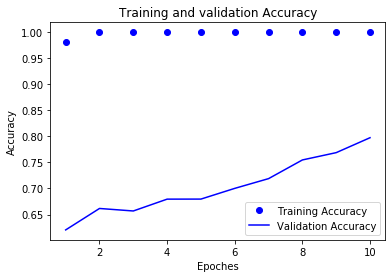

In [16]:
import numpy as np
import matplotlib.pyplot as plt

history_dict = hist.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epoches = np.arange(1,len(history_dict['accuracy'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()


# Building model (relu)

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30,activation="relu",input_shape=(len(train_data.columns),) ))
model.add(Dense(20,activation="relu" ))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop'
              ,loss='binary_crossentropy'
              ,metrics=['accuracy'])


In [19]:
hist2 = model.fit(train_data,train_labels,epochs=100,batch_size=256,validation_data=(val_data,val_labels))

Train on 142403 samples, validate on 56961 samples
Epoch 1/100
142403/142403 [==============================] - 2s 16us/step - loss: 0.1287 - accuracy: 0.9488 - val_loss: 0.0214 - val_accuracy: 0.9993
Epoch 2/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0252 - val_accuracy: 0.9989
Epoch 3/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0185 - val_accuracy: 0.9986
Epoch 4/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0168 - val_accuracy: 0.9987
Epoch 5/100
142403/142403 [==============================] - 2s 15us/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0237 - val_accuracy: 0.9960
Epoch 6/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0309 - val_accuracy: 0.9929
Epoch 7/100
142403/142403 [======================

Epoch 55/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0327 - val_accuracy: 0.9954
Epoch 56/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0735 - val_accuracy: 0.9885
Epoch 57/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0683 - val_accuracy: 0.9892
Epoch 58/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0449 - val_accuracy: 0.9926
Epoch 59/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0488 - val_accuracy: 0.9926
Epoch 60/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0980 - val_accuracy: 0.9869
Epoch 61/100
142403/142403 [==============================] - 2s 14us/step - loss: 0.0017 - ac

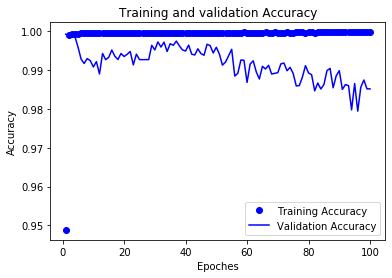

In [20]:
import numpy as np
import matplotlib.pyplot as plt

history_dict = hist2.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epoches = np.arange(1,len(history_dict['accuracy'])+1)
plt.plot(epoches,acc_values,'bo',label="Training Accuracy")
plt.plot(epoches,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Accuracy")
plt.legend()


# Evaluation

In [34]:
test_loss , test_acc = model.evaluate(test_data,test_labels)


85443/85443 [==============================] - 2s 22us/step


# Prediction

In [36]:
scores =model.evaluate(test_data,test_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

85443/85443 [==============================] - 2s 22us/step
accuracy: 99.00%
